#### Задание (0/2)
- [x] Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны
- [x] Построить график корреляции между средним доходом (PPP) и ценой подписки 

#### Вопросы (0/7)
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
- [x] Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
- [x] Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
- [x] Какой процент среднего дохода россиянина будет составлять подписка Netflix?
- [x] На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
- [x] В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

#### Ограничения (0/5)
- [x] Данные, используемые в ноутбуке с решением, должны подтягиваться через url c удаленного источника (википедии, google sheets, etc)
- [x] Нельзя использовать циклы for, while для работы с данными. Используйте инструменты Pandas
- [x] Должны присутствовать методы df.apply, pd.merge, pd.concat
- [x] В приведенной статье есть готовые выводы, их нельзя использовать.
- [x] Решение оформить в виде репозитория на github.com


# Задание

Так как мы практикуемся в работе конкретно с API Pandas, на ноутбук с решением накладываются следующие ограничения: 

- Данные, используемые в ноутбуке с решением, должны подтягиваться через url c удаленного источника (википедии, google sheets, etc)
- Нельзя использовать циклы for, while для работы с данными. Используйте инструменты Pandas
- Должны присутствовать методы df.apply, pd.merge, pd.concat
- В приведенной статье есть готовые выводы, их нельзя использовать.
- Решение оформить в виде репозитория на github.com

In [1]:
import pandas as pd
import seaborn as sns

Выгружаем данные по тарифам netflix

In [2]:
url_netflix = 'https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid={0}&format=csv'
gid_basic = '0'
gid_standard = '720312140'
gid_premium = '41907226'

In [3]:
df_basic = pd.read_csv(url_netflix.format(gid_basic), nrows=65, usecols=[0,1,2,4,5,6,7])
df_standard = pd.read_csv(url_netflix.format(gid_standard), nrows=65, usecols=[0,1,4])
df_premium = pd.read_csv(url_netflix.format(gid_premium), nrows=65, usecols=[0,1,4])

Проверяем количество строк

In [4]:
df_basic

,Country,Basic,Currency,Price USD,# of TV Shows,# of Movies,Total Library Size
0,Turkey,26.99,TRY,1.97,2930,1709,4639
1,India,199.00,INR,2.64,3718,2125,5843
2,Argentina,379.00,ARS,3.74,3154,1606,4760
3,Colombia,16900.00,COP,4.31,3156,1835,4991
4,Brazil,25.90,BRL,4.61,3162,1810,4972
...,...,...,...,...,...,...,...
60,Sweden,99.00,SEK,10.90,2973,1388,4361
61,Denmark,79.00,DKK,12.00,2978,1580,4558
62,San Marino,7.99,EUR,9.03,1937,373,2310
63,Croatia,7.99,EUR,9.03,1675,599,2274


Форматируем названия столбцов и объединяем таблицы по названию страны

In [5]:
df_basic.rename(columns={'Price USD': 'Basic price, USD'}, inplace=True)
df_standard.rename(columns={'Price USD': 'Standard price, USD'}, inplace=True)
df_premium.rename(columns={'Price USD': 'Premium price, USD'}, inplace=True)

In [6]:
df_netflix = pd.merge(pd.merge(df_basic,df_standard,on='Country'),df_premium,on='Country')

In [7]:
df_netflix

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,"Premium price, USD"
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,4.02
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,8.60
2,Argentina,379.00,ARS,3.74,3154,1606,4760,639.00,6.30,939.00,9.26
3,Colombia,16900.00,COP,4.31,3156,1835,4991,26900.00,6.86,38900.00,9.93
4,Brazil,25.90,BRL,4.61,3162,1810,4972,39.90,7.11,55.90,9.96
...,...,...,...,...,...,...,...,...,...,...,...
60,Sweden,99.00,SEK,10.90,2973,1388,4361,129.00,14.20,179.00,19.70
61,Denmark,79.00,DKK,12.00,2978,1580,4558,99.00,15.04,129.00,19.60
62,San Marino,7.99,EUR,9.03,1937,373,2310,12.99,14.67,17.99,20.32
63,Croatia,7.99,EUR,9.03,1675,599,2274,9.99,11.29,11.99,13.54


In [8]:
df_netflix.describe()

,Basic,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,"Premium price, USD"
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,2449.236923,8.383846,3518.953846,1795.461538,5314.415385,3255.201538,12.070769,4082.889231,15.712462
std,15015.272498,1.946779,723.010556,327.279748,980.322633,19248.238760,2.948041,23537.372500,4.125946
min,4.990000,1.970000,1675.000000,373.000000,2274.000000,7.490000,3.000000,9.990000,4.020000
25%,7.990000,7.990000,3154.000000,1628.000000,4948.000000,11.490000,10.710000,14.690000,13.540000
50%,8.990000,8.990000,3512.000000,1841.000000,5195.000000,13.490000,11.490000,17.990000,14.450000
75%,89.000000,9.030000,3832.000000,1980.000000,5952.000000,109.000000,13.540000,159.000000,18.480000
max,120000.000000,12.880000,5234.000000,2387.000000,7325.000000,153000.000000,20.460000,186000.000000,26.960000


Везде по 65 наблюдений (count). Пропущенных данных (NaN) среди числовых столбцов нет.

**Средний доход (PPP) по странам**

In [9]:
url_gdppc = 'https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.PP.CD?downloadformat=excel'
df_gdppc = pd.read_excel(url_gdppc, skiprows=3)

In [10]:
df_gdppc.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,34324.799359,33567.550017,36829.032774,36779.429429,37311.750320,37585.025079,38897.122666,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3320.493308,3235.163359,3362.868809,3499.132878,3527.164192,3620.921502,3697.459305,3786.357310,3836.571430,3677.111255
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1699.488110,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.635648,2152.366489,2077.874554
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3675.392441,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.815774,4335.199547,4240.534782
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6710.750623,7412.967035,7682.475386,8179.297828,7337.569822,7103.226431,7310.896589,7099.971958,6952.419362,6443.032680


In [11]:
df_gdppc.rename(columns={'Country Name': 'Country'}, inplace=True)

Проверим названия ключей (названия стран), для которых есть расхождения. Переименуем в единый стиль.

In [12]:
set(df_netflix['Country'].unique()) - set(df_gdppc['Country'].unique())

{'Hong Kong', 'Russia', 'Slovakia', 'South Korea', 'Taiwan', 'Venezuela'}

In [13]:
set(df_gdppc['Country'].unique())

{'Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',

In [14]:
mapping = {'Hong Kong SAR, China':'Hong Kong',
           'Russian Federation': 'Russia',
           'Slovak Republic': 'Slovakia',
           'Korea, Rep.': 'South Korea',
           'Venezuela, RB': 'Venezuela'}

df_gdppc['Country'] = df_gdppc['Country'].apply(lambda name: mapping[name] if name in mapping else name)

Аппроксимируем Тайвань к "high-income countries aggregate" на основе классификации Worldbank (более подробно см. ссылку).

https://datahelpdesk.worldbank.org/knowledgebase/articles/906519

In [15]:
df_taiwan = df_gdppc[df_gdppc['Country']=='High income'].copy()
df_taiwan['Country'] = 'Taiwan'
df_gdppc = pd.concat([df_gdppc, df_taiwan])

Проверим наличие расхождения после преобразования

In [16]:
set(df_netflix['Country'].unique()) - set(df_gdppc['Country'].unique())

set()

Проверим наличие данных по показателю среднего дохода

In [17]:
df_gdppc[(df_gdppc['Country'].isin(df_netflix['Country'].unique()))
         & (df_gdppc['2020'].isnull())]

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
84,Gibraltar,GIB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,Liechtenstein,LIE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,Monaco,MCO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,San Marino,SMR,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,57954.429679,54450.484029,53465.094019,55432.069937,55614.622171,57455.56337,58867.013363,61006.848205,63420.327135,NaN
254,Venezuela,VEN,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,17527.748738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для San Marino возьмем средний доход за 2019 г. Для остальных аппроксимируем к классификации Worldbank (более подробно см. ссылку).

https://datahelpdesk.worldbank.org/knowledgebase/articles/906519

In [18]:
# Заполняем пропущенный средний доход для Сан-Марино
mask = df_gdppc['Country']=='San Marino'
df_gdppc.loc[mask, '2020'] = df_gdppc.loc[mask, '2019']

In [19]:
# Заполняем пропущенный средний доход для остальных стран
high_income = df_gdppc.loc[df_gdppc['Country']=='High income', '2020']
lm_income = df_gdppc.loc[df_gdppc['Country']=='Lower middle income', '2020']

mask = df_gdppc['Country'].isin(('Gibraltar', 'Liechtenstein', 'Monaco'))
df_gdppc.loc[mask, '2020'] = float(high_income)

mask = df_gdppc['Country'].isin(['Venezuela'])
df_gdppc.loc[mask, '2020'] = float(lm_income)

In [20]:
df = df_netflix.merge(df_gdppc[['Country','2020']], how='left', on='Country')
df.rename(columns={'2020': 'GDP per capita (PPP), USD'}, inplace=True)

In [21]:
df.describe()

,Basic,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,"Premium price, USD","GDP per capita (PPP), USD"
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,2449.236923,8.383846,3518.953846,1795.461538,5314.415385,3255.201538,12.070769,4082.889231,15.712462,36580.358787
std,15015.272498,1.946779,723.010556,327.279748,980.322633,19248.238760,2.948041,23537.372500,4.125946,20867.358271
min,4.990000,1.970000,1675.000000,373.000000,2274.000000,7.490000,3.000000,9.990000,4.020000,5418.215811
25%,7.990000,7.990000,3154.000000,1628.000000,4948.000000,11.490000,10.710000,14.690000,13.540000,18793.744539
50%,8.990000,8.990000,3512.000000,1841.000000,5195.000000,13.490000,11.490000,17.990000,14.450000,34406.235101
75%,89.000000,9.030000,3832.000000,1980.000000,5952.000000,109.000000,13.540000,159.000000,18.480000,50766.789002
max,120000.000000,12.880000,5234.000000,2387.000000,7325.000000,153000.000000,20.460000,186000.000000,26.960000,98483.342004


Пропущенных данных все еще нет

**График корреляции между средним доходом (PPP) и ценой подписки**

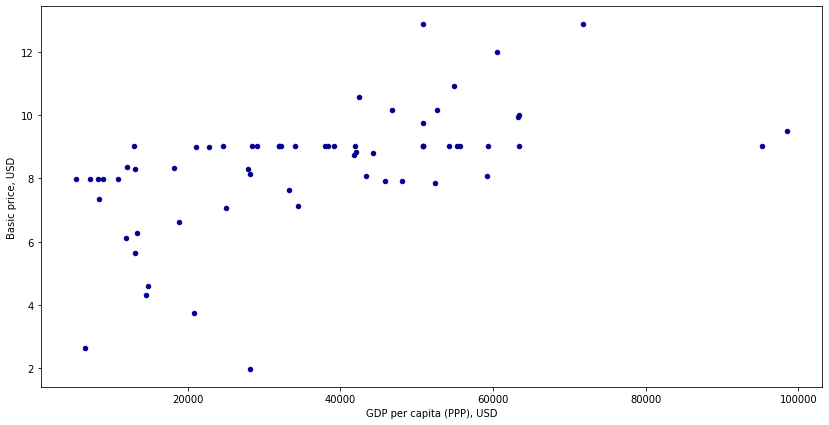

In [22]:
df.plot.scatter(x='GDP per capita (PPP), USD',
                y='Basic price, USD',
                c='DarkBlue',
                figsize=(14, 7))

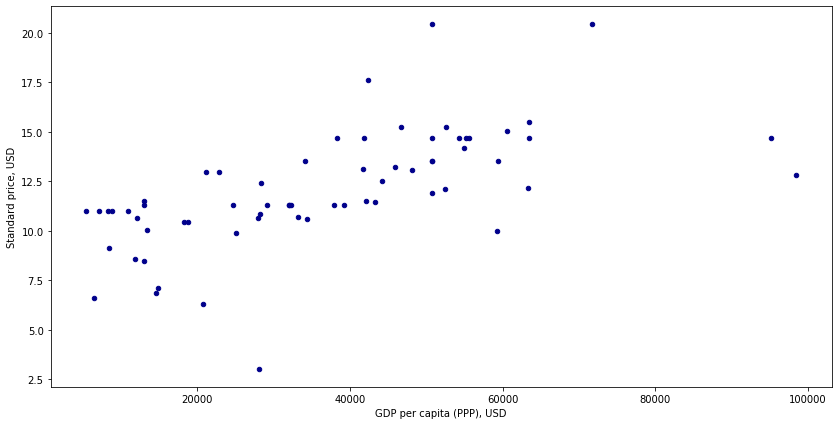

In [23]:
df.plot.scatter(x='GDP per capita (PPP), USD',
                y='Standard price, USD',
                c='DarkBlue',
                figsize=(14, 7))

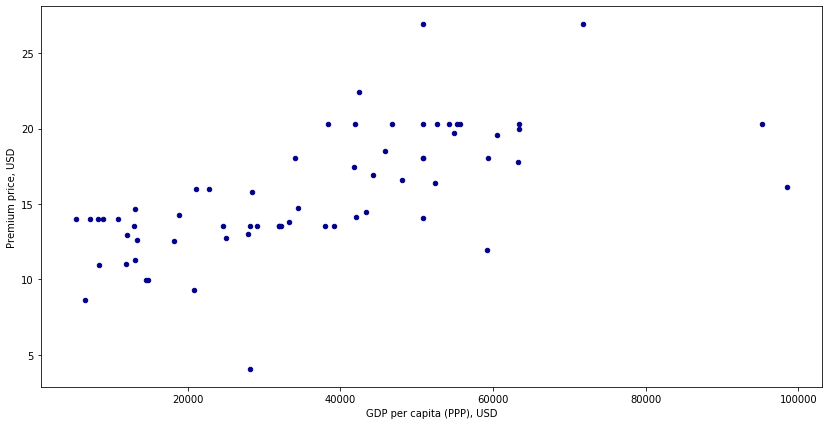

In [24]:
df.plot.scatter(x='GDP per capita (PPP), USD',
                y='Premium price, USD',
                c='DarkBlue',
                figsize=(14, 7))

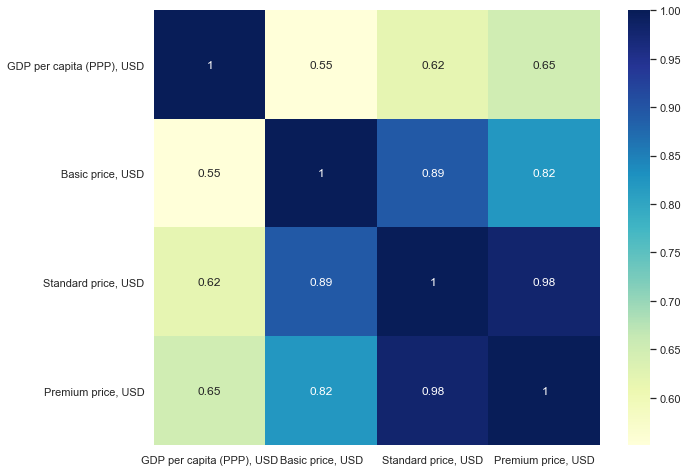

In [25]:
columns = ['GDP per capita (PPP), USD', 'Basic price, USD', 'Standard price, USD', 'Premium price, USD']
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df[columns].corr(), annot=True, cmap="YlGnBu")

По графикам видно, что между ценой подписки и средним доходом страны есть положительная корреляция

**Средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны** 

In [26]:
df_currency_agg = df.groupby('Currency').agg(average_basic_price=('Basic price, USD', 'mean'),
                                             average_standard_price=('Standard price, USD', 'mean'),
                                             average_premium_price=('Premium price, USD', 'mean'))

df_currency_agg.sort_values(by='average_basic_price', ascending=False)

,average_basic_price,average_standard_price,average_premium_price
Currency,,,
CHF,12.880000,20.46,26.960000
DKK,12.000000,15.04,19.600000
SEK,10.900000,14.20,19.700000
ILS,10.560000,17.62,22.430000
NOK,9.940000,12.17,17.750000
TWD,9.740000,11.90,14.070000
SGD,9.510000,12.81,16.110000
EUR,8.982917,13.05,17.118750
CZK,8.830000,11.49,14.150000


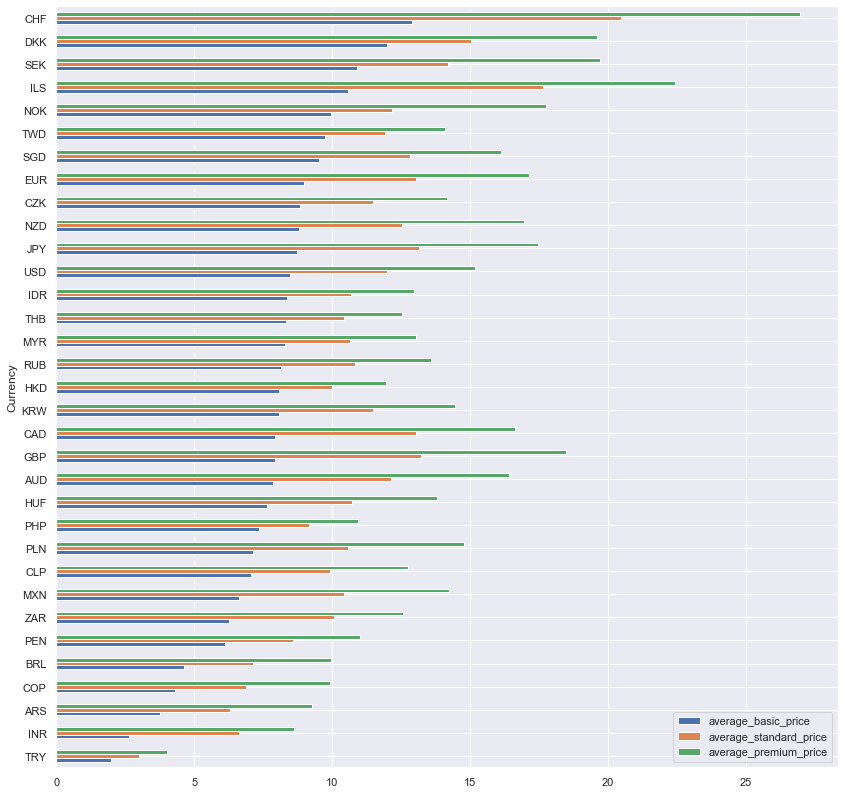

In [27]:
df_currency_agg.sort_values(by='average_basic_price').plot.barh(figsize=(14, 14))

Самые дорогие подписки у Швейцарии и Лихтейнштейна (CHF). Следом за ними расположились Израиль (ILS), Дания (DKK) и Швеция (SEK). 

Самые дешевые - в Турции (TRY), Индии (INR) и Аргентине (ARS)

**Средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента**

Загрузим данные по континентам

In [28]:
url_continent = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
df_continent = pd.read_csv(url_continent)

In [29]:
df = df.merge(df_continent, how='left', on='Country')

In [30]:
df['Continent'].value_counts()

Europe           31
South America    10
Asia              9
North America     5
Oceania           2
Africa            1
Name: Continent, dtype: int64

Проверим наличие пропущенных данных

In [31]:
set(df_netflix['Country'].unique()) - set(df_continent['Country'].unique())

{'Czech Republic',
 'Gibraltar',
 'Hong Kong',
 'Russia',
 'South Korea',
 'Taiwan',
 'United States'}

In [32]:
# Заполняем пропущенные континенты

mask = df['Country'].isin(('Czech Republic', 'Gibraltar', 'Russia'))
df.loc[mask, 'Continent'] = 'Europe'

mask = df['Country'].isin(('Hong Kong', 'South Korea', 'Taiwan'))
df.loc[mask, 'Continent'] = 'Asia'

mask = df['Country'].isin(['United States'])
df.loc[mask, 'Continent'] = 'North America'

Проверим наличие пропущенных данных после преобразования

In [33]:
df['Continent'].isnull().sum()

0

Построим графики

In [34]:
df_сontinent_agg = df.groupby('Continent').agg(average_basic_price=('Basic price, USD', 'mean'),
                                               average_standard_price=('Standard price, USD', 'mean'),
                                               average_premium_price=('Premium price, USD', 'mean'),
                                               count=('Country', 'count'))

df_сontinent_agg.sort_values(by='average_basic_price', ascending=False)

,average_basic_price,average_standard_price,average_premium_price,count
Continent,,,,
Europe,9.230294,13.304412,17.545588,34
Oceania,8.320000,12.325000,16.665000,2
North America,8.248333,12.323333,15.801667,6
Asia,7.636667,10.618333,13.207500,12
South America,6.709000,9.619000,12.555000,10
Africa,6.260000,10.050000,12.580000,1


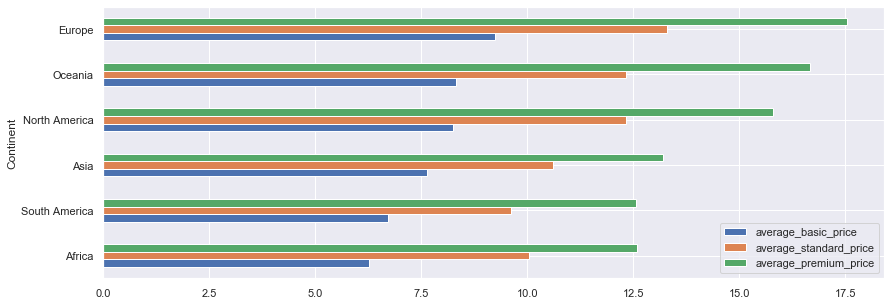

In [35]:
df_сontinent_agg.iloc[:,:3].sort_values(by='average_basic_price').plot.barh(figsize=(14, 5))

**Стоимость подписки относительно среднего дохода (базовая, стандартная, премиум) в Чехии?**

Отношение годовой подписки к среднему годовому доходу

In [36]:
df['Basic price per income, %'] = 12*df['Basic price, USD']/df['GDP per capita (PPP), USD']*100
df['Standard price per income, %'] = 12*df['Standard price, USD']/df['GDP per capita (PPP), USD']*100
df['Premium price per income, %'] = 12*df['Premium price, USD']/df['GDP per capita (PPP), USD']*100

In [37]:
df.loc[df['Country']=='Czech Republic', ['Country', 
                                         'Basic price per income, %', 
                                         'Standard price per income, %', 
                                         'Premium price per income, %']]

,Country,"Basic price per income, %","Standard price per income, %","Premium price per income, %"
10,Czech Republic,0.251991,0.327902,0.403813


**Топ-5 стран с самой большой доступной коллекцией сериалов**

In [38]:
df.nlargest(5, '# of TV Shows')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,"Premium price, USD","GDP per capita (PPP), USD",Continent,"Basic price per income, %","Standard price per income, %","Premium price per income, %"
10,Czech Republic,199.00,CZK,8.83,5234,2091,7325,259.00,11.49,319.00,14.15,42049.185954,Europe,0.251991,0.327902,0.403813
14,Slovakia,7.99,EUR,9.03,5055,1980,7035,9.99,11.29,11.99,13.54,32014.553263,Europe,0.338471,0.423183,0.507519
16,Bulgaria,7.99,EUR,9.03,4819,1978,6797,9.99,11.29,11.99,13.54,24619.950887,Europe,0.440131,0.550285,0.659953
7,Hungary,2490.00,HUF,7.64,4802,2082,6884,3490.00,10.71,4490.00,13.78,33253.880030,Europe,0.275697,0.386481,0.497265
9,United Kingdom,5.99,GBP,7.91,4551,2092,6643,9.99,13.20,13.99,18.48,45852.688886,Europe,0.207011,0.345454,0.483636


**Процент среднего дохода россиянина на подписку Netflix?**

In [39]:
df.loc[df['Country']=='Russia', ['Country', 
                                 'Basic price per income, %', 
                                 'Standard price per income, %', 
                                 'Premium price per income, %']]

,Country,"Basic price per income, %","Standard price per income, %","Premium price per income, %"
25,Russia,0.345793,0.461057,0.576746


**На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)**

In [40]:
df['Basic cost per title'] = df['Basic price, USD']/df['Total Library Size']
df['Standard cost per title'] = df['Standard price, USD']/df['Total Library Size']
df['Premium cost per title'] = df['Premium price, USD']/df['Total Library Size']

Расставим ранги

In [41]:
df['rank (basic fee)'] = df['Basic cost per title'].rank()
df['rank (standard fee)'] = df['Standard cost per title'].rank()
df['rank (premium fee)'] = df['Premium cost per title'].rank()

In [42]:
df.loc[df['Country']=='Russia', ['rank (basic fee)', 'rank (standard fee)', 'rank (premium fee)']].astype(int)

,rank (basic fee),rank (standard fee),rank (premium fee)
25,26,18,18


**В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?**

При выборе VPN лучше ориентироваться на стоимость тарифов, если вас интересуют только самые популярные фильмы и сериалы и у вас нет много времени или желания на просмотр всего разнообразия из каталога Netflix

In [43]:
# Если подписка на одного человека
df.nsmallest(3, 'Basic price, USD')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,Continent,"Basic price per income, %","Standard price per income, %","Premium price per income, %",Basic cost per title,Standard cost per title,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee)
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,Asia,0.084087,0.128051,0.171589,0.000425,0.000647,0.000867,1.0,1.0,1.0
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,Asia,0.487270,1.220021,1.587320,0.000452,0.001131,0.001472,2.0,2.0,2.0
2,Argentina,379.00,ARS,3.74,3154,1606,4760,639.00,6.30,939.00,...,South America,0.216154,0.364109,0.535183,0.000786,0.001324,0.001945,3.0,3.0,6.0


In [44]:
# Если подписка на двух человек
df.nsmallest(3, 'Standard price, USD')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,Continent,"Basic price per income, %","Standard price per income, %","Premium price per income, %",Basic cost per title,Standard cost per title,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee)
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,Asia,0.084087,0.128051,0.171589,0.000425,0.000647,0.000867,1.0,1.0,1.0
2,Argentina,379.00,ARS,3.74,3154,1606,4760,639.00,6.30,939.00,...,South America,0.216154,0.364109,0.535183,0.000786,0.001324,0.001945,3.0,3.0,6.0
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,Asia,0.487270,1.220021,1.587320,0.000452,0.001131,0.001472,2.0,2.0,2.0


In [45]:
# Если подписка на четырех человек
df.nsmallest(3, 'Premium price, USD')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,Continent,"Basic price per income, %","Standard price per income, %","Premium price per income, %",Basic cost per title,Standard cost per title,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee)
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,Asia,0.084087,0.128051,0.171589,0.000425,0.000647,0.000867,1.0,1.0,1.0
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,Asia,0.487270,1.220021,1.587320,0.000452,0.001131,0.001472,2.0,2.0,2.0
2,Argentina,379.00,ARS,3.74,3154,1606,4760,639.00,6.30,939.00,...,South America,0.216154,0.364109,0.535183,0.000786,0.001324,0.001945,3.0,3.0,6.0


Если все же есть желание и возможность просмотреть весь каталог Netflix, то лучше ориентироваться на показатель «Cost per title»

In [46]:
# Если подписка на одного человека
df.nsmallest(3, 'Basic cost per title')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,Continent,"Basic price per income, %","Standard price per income, %","Premium price per income, %",Basic cost per title,Standard cost per title,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee)
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,Asia,0.084087,0.128051,0.171589,0.000425,0.000647,0.000867,1.0,1.0,1.0
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,Asia,0.487270,1.220021,1.587320,0.000452,0.001131,0.001472,2.0,2.0,2.0
2,Argentina,379.00,ARS,3.74,3154,1606,4760,639.00,6.30,939.00,...,South America,0.216154,0.364109,0.535183,0.000786,0.001324,0.001945,3.0,3.0,6.0


In [47]:
# Если подписка на двух человек
df.nsmallest(3, 'Standard cost per title')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,Continent,"Basic price per income, %","Standard price per income, %","Premium price per income, %",Basic cost per title,Standard cost per title,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee)
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,Asia,0.084087,0.128051,0.171589,0.000425,0.000647,0.000867,1.0,1.0,1.0
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,Asia,0.487270,1.220021,1.587320,0.000452,0.001131,0.001472,2.0,2.0,2.0
2,Argentina,379.00,ARS,3.74,3154,1606,4760,639.00,6.30,939.00,...,South America,0.216154,0.364109,0.535183,0.000786,0.001324,0.001945,3.0,3.0,6.0


In [48]:
# Если подписка на четырех человек
df.nsmallest(3, 'Premium cost per title')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,Continent,"Basic price per income, %","Standard price per income, %","Premium price per income, %",Basic cost per title,Standard cost per title,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee)
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,Asia,0.084087,0.128051,0.171589,0.000425,0.000647,0.000867,1.0,1.0,1.0
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,Asia,0.487270,1.220021,1.587320,0.000452,0.001131,0.001472,2.0,2.0,2.0
8,Philippines,369.00,PHP,7.35,4154,2208,6362,459.00,9.14,549.00,...,Asia,1.051662,1.307781,1.563900,0.001155,0.001437,0.001718,9.0,6.0,3.0


Если у вас есть желание просмотреть только сериалы Netflix, то лучше ориентироваться на показатель «Cost per TV Shows»

In [49]:
df['Basic cost per TV Shows'] = df['Basic price, USD']/df['# of TV Shows']
df['Standard cost per TV Shows'] = df['Standard price, USD']/df['# of TV Shows']
df['Premium cost per TV Shows'] = df['Premium price, USD']/df['# of TV Shows']

In [50]:
# Если подписка на одного человека
df.nsmallest(3, 'Basic cost per TV Shows')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,"Premium price per income, %",Basic cost per title,Standard cost per title,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee),Basic cost per TV Shows,Standard cost per TV Shows,Premium cost per TV Shows
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,0.171589,0.000425,0.000647,0.000867,1.0,1.0,1.0,0.000672,0.001024,0.001372
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,1.587320,0.000452,0.001131,0.001472,2.0,2.0,2.0,0.000710,0.001778,0.002313
2,Argentina,379.00,ARS,3.74,3154,1606,4760,639.00,6.30,939.00,...,0.535183,0.000786,0.001324,0.001945,3.0,3.0,6.0,0.001186,0.001997,0.002936


In [51]:
# Если подписка на двух человек
df.nsmallest(3, 'Standard cost per TV Shows')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,"Premium price per income, %",Basic cost per title,Standard cost per title,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee),Basic cost per TV Shows,Standard cost per TV Shows,Premium cost per TV Shows
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,0.171589,0.000425,0.000647,0.000867,1.0,1.0,1.0,0.000672,0.001024,0.001372
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,1.587320,0.000452,0.001131,0.001472,2.0,2.0,2.0,0.000710,0.001778,0.002313
2,Argentina,379.00,ARS,3.74,3154,1606,4760,639.00,6.30,939.00,...,0.535183,0.000786,0.001324,0.001945,3.0,3.0,6.0,0.001186,0.001997,0.002936


In [52]:
# Если подписка на четырех человек
df.nsmallest(3, 'Premium cost per TV Shows')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,"Premium price per income, %",Basic cost per title,Standard cost per title,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee),Basic cost per TV Shows,Standard cost per TV Shows,Premium cost per TV Shows
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,0.171589,0.000425,0.000647,0.000867,1.0,1.0,1.0,0.000672,0.001024,0.001372
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,1.587320,0.000452,0.001131,0.001472,2.0,2.0,2.0,0.000710,0.001778,0.002313
8,Philippines,369.00,PHP,7.35,4154,2208,6362,459.00,9.14,549.00,...,1.563900,0.001155,0.001437,0.001718,9.0,6.0,3.0,0.001769,0.002200,0.002631


Если у вас есть желание просмотреть только фильмы Netflix, то лучше ориентироваться на показатель «Cost per TV Movies»

In [53]:
df['Basic cost per Movies'] = df['Basic price, USD']/df['# of Movies']
df['Standard cost per Movies'] = df['Standard price, USD']/df['# of Movies']
df['Premium cost per Movies'] = df['Premium price, USD']/df['# of Movies']

In [54]:
# Если подписка на одного человека
df.nsmallest(3, 'Basic cost per Movies')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee),Basic cost per TV Shows,Standard cost per TV Shows,Premium cost per TV Shows,Basic cost per Movies,Standard cost per Movies,Premium cost per Movies
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,0.000867,1.0,1.0,1.0,0.000672,0.001024,0.001372,0.001153,0.001755,0.002352
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,0.001472,2.0,2.0,2.0,0.000710,0.001778,0.002313,0.001242,0.003111,0.004047
2,Argentina,379.00,ARS,3.74,3154,1606,4760,639.00,6.30,939.00,...,0.001945,3.0,3.0,6.0,0.001186,0.001997,0.002936,0.002329,0.003923,0.005766


In [55]:
# Если подписка на двух человек
df.nsmallest(3, 'Standard cost per Movies')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee),Basic cost per TV Shows,Standard cost per TV Shows,Premium cost per TV Shows,Basic cost per Movies,Standard cost per Movies,Premium cost per Movies
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,0.000867,1.0,1.0,1.0,0.000672,0.001024,0.001372,0.001153,0.001755,0.002352
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,0.001472,2.0,2.0,2.0,0.000710,0.001778,0.002313,0.001242,0.003111,0.004047
3,Colombia,16900.00,COP,4.31,3156,1835,4991,26900.00,6.86,38900.00,...,0.001990,4.0,4.0,7.0,0.001366,0.002174,0.003146,0.002349,0.003738,0.005411


In [56]:
# Если подписка на четырех человек
df.nsmallest(3, 'Premium cost per Movies')

,Country,Basic,Currency,"Basic price, USD",# of TV Shows,# of Movies,Total Library Size,Standard,"Standard price, USD",Premium,...,Premium cost per title,rank (basic fee),rank (standard fee),rank (premium fee),Basic cost per TV Shows,Standard cost per TV Shows,Premium cost per TV Shows,Basic cost per Movies,Standard cost per Movies,Premium cost per Movies
0,Turkey,26.99,TRY,1.97,2930,1709,4639,40.99,3.00,54.99,...,0.000867,1.0,1.0,1.0,0.000672,0.001024,0.001372,0.001153,0.001755,0.002352
1,India,199.00,INR,2.64,3718,2125,5843,499.00,6.61,649.00,...,0.001472,2.0,2.0,2.0,0.000710,0.001778,0.002313,0.001242,0.003111,0.004047
8,Philippines,369.00,PHP,7.35,4154,2208,6362,459.00,9.14,549.00,...,0.001718,9.0,6.0,3.0,0.001769,0.002200,0.002631,0.003329,0.004139,0.004950


Напишем функцию, которая определяет лучшую страну для vpn в зависимости от желаемого объема каталога

In [57]:
def choose_vpn(data,
               threshold: int,
               catalog: str='Total Library Size',
               subscription_plan: str='Basic price, USD'):
    """
    Выводит лучшую страну для vpn в зависимости от желаемого объема каталога (threshold), 
    типа каталога (filter_col) и типа подписки (subscription_plan)
    """
    
    max_threshold = data[catalog].max()
    if threshold > max_threshold:
        print(f'Максимальный объем каталога составляет всего {max_threshold} позиций')
        threshold = max_threshold
    
    df = data[['Country', subscription_plan, catalog]].copy()
    df = df[df[catalog] >= threshold]
    df['Cost per title'] = df[subscription_plan]/threshold
    vpn_country = df.nsmallest(1, 'Cost per title')['Country'].to_string(index=False)
    
    print(f'Берите VPN в {vpn_country}, если объем желаемого каталога составляет {threshold} позиций')

In [58]:
for threshold in (3000, 4000, 5000, 6000, 7000, 10000):
    choose_vpn(df, threshold)

Берите VPN в  Turkey, если объем желаемого каталога составляет 3000 позиций
Берите VPN в  Turkey, если объем желаемого каталога составляет 4000 позиций
Берите VPN в  India, если объем желаемого каталога составляет 5000 позиций
Берите VPN в  Philippines, если объем желаемого каталога составляет 6000 позиций
Берите VPN в  Czech Republic, если объем желаемого каталога составляет 7000 позиций
Максимальный объем каталога составляет всего 7325 позиций
Берите VPN в  Czech Republic, если объем желаемого каталога составляет 7325 позиций
